# Módulo 27 - PCA

### Tarefa 02: Classificação de Atividade Humana com PCA

Luciana Gonzaga

---

Vamos trabalhar com a base da demonstração feita em aula, mas vamos explorar um pouco melhor como é o desempenho da árvore variando o número de componentes principais.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix

In [2]:
filename_features = "./Dados/UCI HAR Dataset/features.txt"
filename_labels = "./Dados/UCI HAR Dataset/activity_labels.txt"

filename_subtrain = "./Dados/UCI HAR Dataset/train/subject_train.txt"
filename_xtrain = "./Dados/UCI HAR Dataset/train/X_train.txt"
filename_ytrain = "./Dados/UCI HAR Dataset/train/y_train.txt"

filename_subtest = "./Dados/UCI HAR Dataset/test/subject_test.txt"
ffilename_xtest = "./Dados/UCI HAR Dataset/test/X_test.txt"
filename_ytest = "./Dados/UCI HAR Dataset/test/y_test.txt"

features = pd.read_csv(filename_features, header=None, names=['nome_var'], squeeze=True, sep="#")
labels = pd.read_csv(filename_labels, delim_whitespace=True, header=None, names=['cod_label', 'label'])

subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'], squeeze=True)
X_train = pd.read_csv(filename_xtrain, delim_whitespace=True, header=None, names=features.tolist())
y_train = pd.read_csv(filename_ytrain, header=None, names=['cod_label'])

subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id'], squeeze=True)
X_test = pd.read_csv(ffilename_xtest, delim_whitespace=True, header=None, names=features.tolist())
y_test = pd.read_csv(filename_ytest, header=None, names=['cod_label'])

C:\Users\windows 10 Pro 2022\AppData\Local\Temp\ipykernel_11492\465872272.py:12: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  features = pd.read_csv(filename_features, header=None, names=['nome_var'], squeeze=True, sep="#")
C:\Users\windows 10 Pro 2022\AppData\Local\Temp\ipykernel_11492\465872272.py:15: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'], squeeze=True)
C:\Users\windows 10 Pro 2022\AppData\Local\Temp\ipykernel_11492\465872272.py:19: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id'], squeeze=True)


## PCA com variáveis padronizadas

Reflexão sobre a escala das variáveis:

**Variáveis em métricas muito diferentes** podem interferir na análise de componentes principais. Lembra que variância é informação pra nós? Pois bem, tipicamente se há uma variável monetária como salário, vai ter uma ordem de variabilidade bem maior que número de filhos, tempo de emprego ou qualquer variável dummy. Assim, as variáveis de maior variância tendem a "dominar" a análise. Nesses casos é comum usar a padronização das variáveis.

Faça duas análises de componentes principais para a base do HAR - com e sem padronização e compare:

- A variância explicada por componente
- A variância explicada acumulada por componente
- A variância percentual por componente
- A variância percentual acumulada por componente
- Quantas componentes você escolheria, em cada caso para explicar 90% da variância?

#### *PCA sem padronização:*

In [3]:
pca = PCA().fit(X_train)

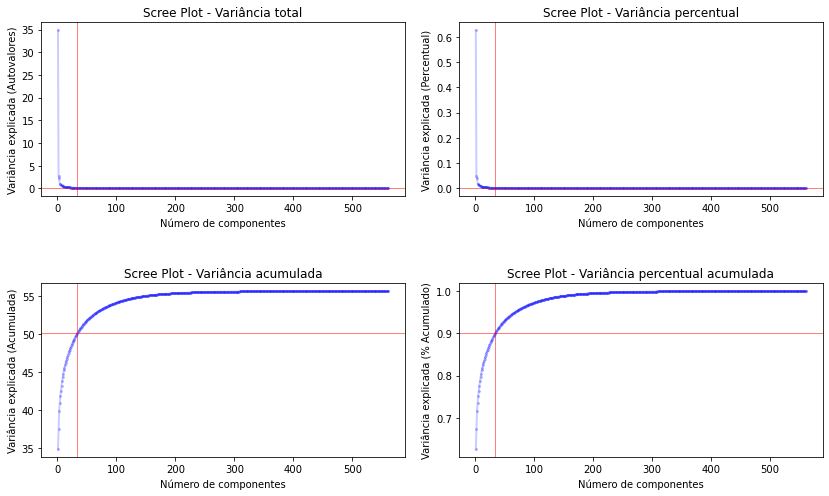

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
plt.subplots_adjust(hspace=0.5, wspace=0.15)

varexplicada = .90
ncomp = (pca.explained_variance_ratio_.cumsum()<varexplicada).sum()+1

num_componentes = np.arange(pca.n_components_) + 1

# Scree Plot - Variância total (Sem Padronização)
axes[0,0].plot(num_componentes, pca.explained_variance_, 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
axes[0,0].set_title('Scree Plot - Variância total')
axes[0,0].set_xlabel('Número de componentes')
axes[0,0].set_ylabel('Variância explicada (Autovalores)')

# Scree Plot - Variância acumulada (Sem Padronização)
axes[1,0].plot(num_componentes, pca.explained_variance_.cumsum(), 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
axes[1,0].set_title('Scree Plot - Variância acumulada')
axes[1,0].set_xlabel('Número de componentes')
axes[1,0].set_ylabel('Variância explicada (Acumulada)')

# Scree Plot - Variância percentual (Sem Padronização)
axes[0,1].plot(num_componentes, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
axes[0,1].set_title('Scree Plot - Variância percentual')
axes[0,1].set_xlabel('Número de componentes')
axes[0,1].set_ylabel('Variância explicada (Percentual)')

# Scree Plot - Variância percentual acumulada (Sem Padronização)
axes[1,1].plot(num_componentes, pca.explained_variance_ratio_.cumsum(), 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
axes[1,1].set_title('Scree Plot - Variância percentual acumulada')
axes[1,1].set_xlabel('Número de componentes')
axes[1,1].set_ylabel('Variância explicada (% Acumulado)')

# linhas verticais de referência
axes[0,0].axvline(x = ncomp, color = 'r', linestyle = '-', linewidth=.5)
axes[1,1].axvline(x = ncomp, color = 'r', linestyle = '-', linewidth=.5)
axes[1,0].axvline(x = ncomp, color = 'r', linestyle = '-', linewidth=.5)
axes[0,1].axvline(x = ncomp, color = 'r', linestyle = '-', linewidth=.5)

# linhas horizontais
ncomp_criterio2 = 50
axes[0,0].axhline(y = pca.explained_variance_[ncomp-1], color = 'r', linestyle = '-', linewidth=.5)
axes[1,0].axhline(y = pca.explained_variance_.cumsum()[ncomp-1], color = 'r', linestyle = '-', linewidth=.5)
axes[0,1].axhline(y = pca.explained_variance_ratio_[ncomp-1], color = 'r', linestyle = '-', linewidth=.5)
axes[1,1].axhline(y = pca.explained_variance_ratio_.cumsum()[ncomp-1], color = 'r', linestyle = '-', linewidth=.5)

plt.show()

In [5]:
print(f'Quantidade de componentes para explicar 90% da variância: {ncomp}')

Quantidade de componentes para explicar 90% da variância: 34


#### *PCA com padronização:*

In [6]:
%%time

def padroniza(s):
    if s.std() > 0:
        s = (s - s.mean())/s.std()
    return s

X_train_pad = pd.DataFrame(X_train).apply(padroniza, axis=0)
X_train_pad.head()

CPU times: total: 359 ms
Wall time: 362 ms


,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
0,0.200628,-0.063678,-0.419600,-0.868755,-0.939377,-0.737479,-0.859758,-0.938955,-0.766385,-0.855978,...,-0.795305,0.025958,-0.276380,-0.360579,0.062935,-0.778374,-0.026079,-0.687172,0.407918,-0.007567
1,0.055944,0.031484,-0.253891,-0.875366,-0.923839,-0.849247,-0.868472,-0.921936,-0.848870,-0.871300,...,0.130605,-0.897296,-0.767938,0.133002,-0.021460,-1.218722,1.484369,-0.694091,0.409089,0.007875
2,0.073510,-0.043414,-0.076289,-0.868980,-0.907698,-0.893724,-0.863078,-0.898793,-0.896640,-0.863264,...,1.152257,-0.260860,-0.438286,-0.377815,0.391949,0.151197,1.704085,-0.702191,0.410260,0.026501
3,0.066691,-0.208407,-0.249695,-0.870566,-0.939959,-0.921743,-0.864445,-0.938060,-0.925216,-0.863264,...,1.112694,0.591005,0.463123,-0.135016,-0.033635,1.037781,-1.002951,-0.701636,0.414622,0.031712
4,0.030467,0.027585,-0.109840,-0.875128,-0.934815,-0.921281,-0.867325,-0.931726,-0.927965,-0.870201,...,-0.149567,-0.138505,-0.240296,0.340383,0.268468,1.125841,-1.276196,-0.700104,0.425434,0.045222


In [7]:
pca_pad = PCA().fit(X_train_pad)

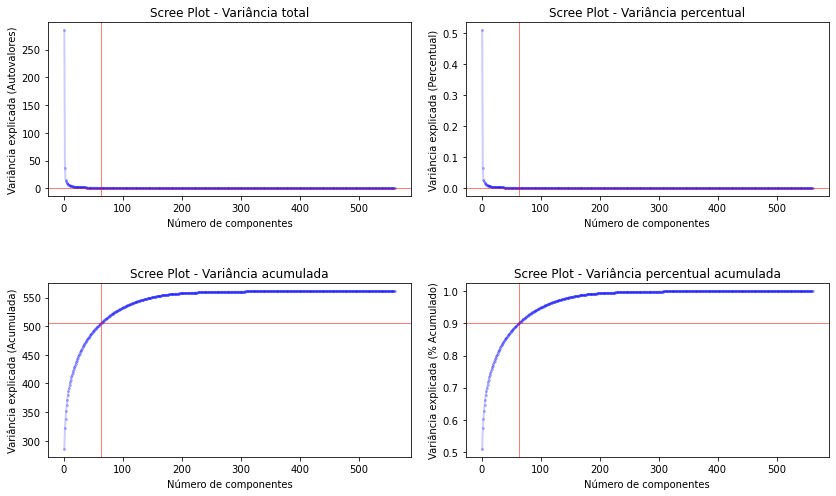

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
plt.subplots_adjust(hspace=0.5, wspace=0.15)

varexplicada = .90
ncomp_pad = (pca_pad.explained_variance_ratio_.cumsum()<varexplicada).sum()+1

num_componentes = np.arange(pca_pad.n_components_) + 1

# Scree Plot - Variância total (Sem Padronização)
axes[0,0].plot(num_componentes, pca_pad.explained_variance_, 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
axes[0,0].set_title('Scree Plot - Variância total')
axes[0,0].set_xlabel('Número de componentes')
axes[0,0].set_ylabel('Variância explicada (Autovalores)')

# Scree Plot - Variância acumulada (Sem Padronização)
axes[1,0].plot(num_componentes, pca_pad.explained_variance_.cumsum(), 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
axes[1,0].set_title('Scree Plot - Variância acumulada')
axes[1,0].set_xlabel('Número de componentes')
axes[1,0].set_ylabel('Variância explicada (Acumulada)')

# Scree Plot - Variância percentual (Sem Padronização)
axes[0,1].plot(num_componentes, pca_pad.explained_variance_ratio_, 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
axes[0,1].set_title('Scree Plot - Variância percentual')
axes[0,1].set_xlabel('Número de componentes')
axes[0,1].set_ylabel('Variância explicada (Percentual)')

# Scree Plot - Variância percentual acumulada (Sem Padronização)
axes[1,1].plot(num_componentes, pca_pad.explained_variance_ratio_.cumsum(), 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
axes[1,1].set_title('Scree Plot - Variância percentual acumulada')
axes[1,1].set_xlabel('Número de componentes')
axes[1,1].set_ylabel('Variância explicada (% Acumulado)')

# linhas verticais de referência
axes[0,0].axvline(x = ncomp_pad, color = 'r', linestyle = '-', linewidth=.5)
axes[1,1].axvline(x = ncomp_pad, color = 'r', linestyle = '-', linewidth=.5)
axes[1,0].axvline(x = ncomp_pad, color = 'r', linestyle = '-', linewidth=.5)
axes[0,1].axvline(x = ncomp_pad, color = 'r', linestyle = '-', linewidth=.5)

# linhas horizontais
ncomp_criterio2 = 50
axes[0,0].axhline(y = pca_pad.explained_variance_[ncomp_pad-1], color = 'r', linestyle = '-', linewidth=.5)
axes[1,0].axhline(y = pca_pad.explained_variance_.cumsum()[ncomp_pad-1], color = 'r', linestyle = '-', linewidth=.5)
axes[0,1].axhline(y = pca_pad.explained_variance_ratio_[ncomp_pad-1], color = 'r', linestyle = '-', linewidth=.5)
axes[1,1].axhline(y = pca_pad.explained_variance_ratio_.cumsum()[ncomp_pad-1], color = 'r', linestyle = '-', linewidth=.5)

plt.show()

In [9]:
print(f'Quantidade de componentes para explicar 90% da variância: {ncomp_pad}')

Quantidade de componentes para explicar 90% da variância: 63


## Árvore com PCA

Faça duas uma árvore de decisão com 10 componentes principais - uma com base em dados padronizados e outra sem padronizar. Utilize o ```ccp_alpha=0.001```.

Compare a acurácia na base de treino e teste.

#### *PCA sem padronização:*

In [10]:
%%time
prcomp = PCA(n_components=10).fit(X_train)

pc_treino = prcomp.transform(X_train)
pc_teste  = prcomp.transform(X_test)

CPU times: total: 516 ms
Wall time: 304 ms


In [11]:
n=10

colunas = ['cp'+str(x+1) for x in list(range(n))]

pc_train = pd.DataFrame(pc_treino[:,:n], columns = colunas)
pc_test  = pd.DataFrame( pc_teste[:,:n], columns = colunas)

pc_train.head()

,cp1,cp2,cp3,cp4,cp5,cp6,cp7,cp8,cp9,cp10
0,-5.520280,-0.290278,-1.529929,1.333238,1.425093,-0.194613,0.577332,0.691472,-1.223519,-0.363560
1,-5.535350,-0.082530,-1.924804,0.671273,0.671260,0.735150,-0.616926,-0.771755,-0.615554,-0.895539
2,-5.474988,0.287387,-2.144642,0.531808,0.207823,-0.037812,0.057669,0.093878,-0.062967,-0.216603
3,-5.677232,0.897031,-2.018220,0.157125,0.759085,1.079539,-0.267763,-0.731348,0.281403,0.466174
4,-5.748749,1.162952,-2.139533,0.207823,0.473090,0.463028,-0.152218,-0.107506,0.289964,0.539623


In [12]:
%%time
clf = DecisionTreeClassifier(random_state=42, ccp_alpha=0.001)

clf.fit(pc_train, y_train)

CPU times: total: 297 ms
Wall time: 148 ms


DecisionTreeClassifier(ccp_alpha=0.001, random_state=42)

In [13]:
y_train_pred = clf.predict(pc_train)
y_test_pred = clf.predict(pc_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

cv_scores = cross_val_score(clf, X_train, y_train, cv=5)

print(f'Acurácia na base de treinamento: {train_accuracy*100:.1f}')
print(f'Acurácia na base de teste: {test_accuracy*100:.1f}')
print(f'Acurácia média na validacão cruzada: {cv_scores.mean()*100:.1f}')

Acurácia na base de treinamento: 89.3
Acurácia na base de teste: 82.4
Acurácia média na validacão cruzada: 85.6


#### *PCA com padronização:*

In [14]:
X_test_pad = pd.DataFrame(X_test).apply(padroniza, axis=0)

In [15]:
%%time
prcomp_pad = PCA(n_components=10).fit(X_train_pad)

pc_treino = prcomp_pad.transform(X_train_pad)
pc_teste  = prcomp_pad.transform(X_test_pad)

CPU times: total: 609 ms
Wall time: 325 ms


In [16]:
n=10

colunas = ['cp'+str(x+1) for x in list(range(n))]

pc_train = pd.DataFrame(pc_treino[:,:n], columns = colunas)
pc_test  = pd.DataFrame( pc_teste[:,:n], columns = colunas)

pc_train.head()

,cp1,cp2,cp3,cp4,cp5,cp6,cp7,cp8,cp9,cp10
0,-16.137446,2.151878,3.144565,-0.272444,6.798358,-4.249181,2.938732,-4.908294,-0.805682,-3.612180
1,-15.295154,1.387049,-0.682177,2.813486,4.265827,-2.055487,0.011482,-1.845166,0.480928,-0.173460
2,-15.135989,2.473183,-1.756521,3.717722,4.181292,-1.357411,0.073034,-1.387437,0.542067,-0.672625
3,-15.349840,3.915414,-1.790199,2.567347,3.205658,-0.942922,0.531168,-1.832071,1.075276,-1.498789
4,-15.543756,4.598424,-2.188432,2.897379,3.080001,-1.061372,-1.049015,-0.816458,0.611174,1.112808


In [17]:
%%time
clf = DecisionTreeClassifier(random_state=42, ccp_alpha=0.001)

clf.fit(pc_train, y_train)

CPU times: total: 234 ms
Wall time: 138 ms


DecisionTreeClassifier(ccp_alpha=0.001, random_state=42)

In [18]:
y_train_pred = clf.predict(pc_train)
y_test_pred = clf.predict(pc_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

cv_scores = cross_val_score(clf, X_train, y_train, cv=5)

print(f'Acurácia na base de treinamento: {train_accuracy*100:.1f}')
print(f'Acurácia na base de teste: {test_accuracy*100:.1f}')
print(f'Acurácia média na validacão cruzada: {cv_scores.mean()*100:.1f}')

Acurácia na base de treinamento: 85.9
Acurácia na base de teste: 77.7
Acurácia média na validacão cruzada: 85.6
